In [29]:
import datajoint as dj

In [30]:
schema = dj.Schema('library')

In [31]:
@schema
class Book(dj.Manual):
    definition = """
isbn : bigint unsigned
---
book_name : varchar(100)
book_author : varchar(100)
book_copies : tinyint unsigned 

"""

In [32]:
@schema
class LibraryMember(dj.Manual):
    definition = """
member_id: int unsigned
---
first_name : varchar(30)
last_name : varchar(30)
member_email : varchar(100)
member_address: varchar(100)
dob:            DATE
-> Book

"""

In [33]:
from faker import Faker
fake = Faker()

import random

In [34]:
Book.insert(dict(
    isbn = random.randint(1000000000000, 9999999999999),
    book_name = fake.catch_phrase(),
    book_author = fake.name(),
    book_copies = random.randint(1, 20)) for _ in range(10))
    

In [35]:
Book()

isbn,book_name,book_author,book_copies
1082541381695,Profound asynchronous orchestration,Frank Thornton,20
2376865449858,Customizable responsive time-frame,Kristin Miller,14
2573541105022,Extended dedicated emulation,Ann Hensley,12
2895670141984,Right-sized system-worthy utilization,Tommy Warner,17
3031139777116,Organized content-based structure,Cynthia Myers,8
4566345128807,Diverse global protocol,Michelle Stewart,14
6389225611939,Fully-configurable mission-critical circuit,Mary Rodriguez,20
6848683601339,Persistent system-worthy pricing structure,Dennis Miller,11
7250856589423,Stand-alone discrete neural-net,Charles Guerrero,9
9715090964959,Distributed cohesive process improvement,Melissa Taylor,14


In [36]:
keys = Book.fetch('KEY')

In [37]:
LibraryMember.insert(
    dict(random.choice(keys),
    member_id = random.randint(10000,99999),
    first_name = fake.first_name(),
    last_name = fake.last_name(),
    member_email = fake.email(),
    member_address = fake.address(),
    dob = fake.date_of_birth()) for _ in range(10))



In [38]:
LibraryMember()

member_id,first_name,last_name,member_email,member_address,dob,isbn
19030,Anne,Dunn,charles49@example.net,"442 Williams Causeway Greerport, CA 09165",1937-09-30,1082541381695
24896,Christopher,Adams,amandabrowning@example.net,"56677 Johnson Gardens Apt. 690 South Mary, DE 44841",1914-05-08,7250856589423
32164,Danny,Woods,cdelgado@example.net,"30751 Williams Route Apt. 185 New Michael, AS 13519",1986-10-10,1082541381695
35402,Bonnie,Miller,leesarah@example.com,"964 Morris Union Port Steven, AR 64691",1958-06-16,6848683601339
38645,Ashley,Osborne,roy62@example.net,"39273 Tina Mountain Suite 456 Valdezburgh, AS 66222",1955-11-06,2376865449858
53131,David,Fleming,sprince@example.net,"4171 Ian Center Apt. 339 Wigginshaven, SD 86140",1937-07-25,1082541381695
70248,Jim,Clark,vhardin@example.net,"495 Michelle Square Jenniferport, VA 31295",1986-11-05,2895670141984
71846,Nicholas,Patterson,sarah34@example.net,"4355 Garcia Orchard Suite 020 Emilychester, NJ 18824",1970-02-05,2573541105022
80462,Ebony,Martinez,alexander30@example.org,"5168 Robles Hill South Elizabeth, AZ 08479",2004-06-28,1082541381695
93504,James,Johnson,brett07@example.net,"832 Jonathan Mills Suite 951 Brianberg, MH 89135",2002-12-20,2376865449858


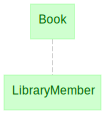

In [39]:
dj.Diagram(schema)

In [40]:
@schema
class BookCopy (dj.Manual):
    definition = """  
    -> Book
    copy_id: tinyint unsigned
    ---
    is_available: bool
    -> LibraryMember
"""

In [41]:
BookCopy_keys = (Book * LibraryMember).fetch('KEY')

In [42]:
BookCopy.insert(
    dict(random.choice(BookCopy_keys),
    copy_id = random.randint(0,255),
    is_available = random.choice([True, False])) for _ in range(10))

In [43]:
BookCopy()

isbn,copy_id,is_available,member_id
1082541381695,36,1,32164
1082541381695,82,1,19030
1082541381695,127,1,53131
2376865449858,83,1,38645
2573541105022,8,0,71846
2573541105022,149,1,71846
2895670141984,33,0,70248
6848683601339,19,0,35402
6848683601339,21,1,35402
7250856589423,155,1,24896


In [44]:
@schema
class CheckOutBook(dj.Manual):
    definition = """
    -> LibraryMember
    -> Book
    ---
    checkout_date: DATE
    return_date:   DATE
    
   
"""

In [45]:
from datetime import datetime, timedelta

In [46]:
libraryMember_keys = LibraryMember.fetch('KEY')

In [49]:
CheckOutBook.insert(
    dict(random.choice(BookCopy_keys),
    dict(random.choice(libraryMember_keys), 
    checkout_date = fake.past_between(start_date='-1y', end_date='today'),
    return_date = fake.date_between(start_date='today', end_date='+1y'))) for _ in range(10))


AttributeError: 'Generator' object has no attribute 'past_between'

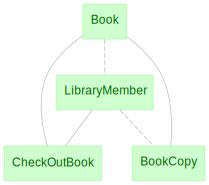

In [170]:
dj.Diagram(schema)

In [28]:
schema.drop()